In [173]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
from cleaning_utils import *
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
def lines_to_words(lines):
    words = []
    for line in lines:
        for word in str(line).split():
            words.append(word)
    return words

In [171]:
cwd = os.getcwd()
# cwd
df = pd.read_csv(os.path.join(cwd, 'MetObjects.txt'))

/var/folders/gw/nk95rbjx5zq50kh26yn5q0mr0000gn/T/ipykernel_27493/688868330.py:3: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(cwd, 'MetObjects.txt'))


In [7]:
peter_col_list = [i for i in range(1, df.shape[1], 3)]
peter_df = df.iloc[:, peter_col_list]
peter_df = peter_df.astype(str, errors="ignore")


In [12]:
peter_df.head(10)


,Is Highlight,Object ID,AccessionYear,Culture,Reign,Artist Role,Artist Display Bio,Artist Nationality,Artist Gender,Object Date,Medium,Geography Type,County,Subregion,Excavation,Rights and Reproduction,Metadata Date,Tags AAT URL
0,False,1,1979.0,nan,nan,Maker,"American, Delaware County, Pennsylvania 1794–1...",American,nan,1853,Gold,nan,nan,nan,nan,nan,nan,nan
1,False,2,1980.0,nan,nan,Maker,1785–1844,,nan,1901,Gold,nan,nan,nan,nan,nan,nan,nan
2,False,3,1967.0,nan,nan,nan,nan,nan,nan,1909–27,Gold,nan,nan,nan,nan,nan,nan,nan
3,False,4,1967.0,nan,nan,nan,nan,nan,nan,1909–27,Gold,nan,nan,nan,nan,nan,nan,nan
4,False,5,1967.0,nan,nan,nan,nan,nan,nan,1909–27,Gold,nan,nan,nan,nan,nan,nan,nan
5,False,6,1967.0,nan,nan,nan,nan,nan,nan,1909–27,Gold,nan,nan,nan,nan,nan,nan,nan
6,False,7,1967.0,nan,nan,nan,nan,nan,nan,1909–27,Gold,nan,nan,nan,nan,nan,nan,http://vocab.getty.edu/page/aat/300266506|http...
7,False,8,1967.0,nan,nan,nan,nan,nan,nan,1909–27,Gold,nan,nan,nan,nan,nan,nan,http://vocab.getty.edu/page/aat/300250049|http...
8,False,9,1967.0,nan,nan,nan,nan,nan,nan,1909–27,Gold,nan,nan,nan,nan,nan,nan,nan
9,False,10,1979.0,nan,nan,Maker,1867–1917,,nan,1912,Gold,nan,nan,nan,nan,nan,nan,nan


In [8]:
pd.DataFrame(peter_df.columns)

,0
0,Is Highlight
1,Object ID
2,AccessionYear
3,Culture
4,Reign
5,Artist Role
6,Artist Display Bio
7,Artist Nationality
8,Artist Gender
9,Object Date


In [ ]:
for col in peter_df.columns:
    unique_values = peter_df[col].unique()
    print('---------')
    print(col,unique_values)

In [19]:
df_clean = df.copy()

# Column Types / Range / Cleaning Tasks
#### Is Highlight 
- bool
- True/False only 
- No cleanup, ok as-is
#### Object ID
- int64
- 1 through 860873
- No cleanup, ok as-is


#### AccessionYear
- 4 digit year
- Ex: nan, 1889.0, 1928, 19171917.0, 1956-08-24
- Clean: keep only first 4 digits will fix all 4 issues

In [111]:
df_clean['AccessionYear'] = df_clean['AccessionYear'].str[:4]
#df_clean['AccessionYear'].dropna()


<AxesSubplot:xlabel='AccessionYear'>

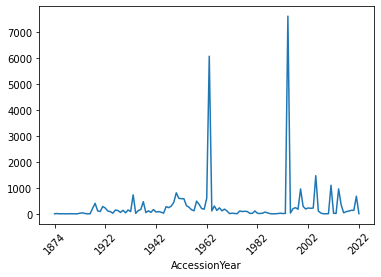

In [110]:
# plot accession years
counts = df_clean['AccessionYear'].dropna().groupby([df['AccessionYear']]).count()
# counts.sort_values()
counts.plot(rot=45)

#### Culture
- category
- Ex: nan, 'reign of Amenhotep III', 'reign of  Xerxes I'
- remove duplicate spaces
- possibly remove 'reign of', 'reigns of', 'or later', 'possibly', 'or slightly later', ',early', ',probably', (anything after comma), (anything in parens), (question marks), (space at end), (split on slash,dash/'and'/'or' and process individually), 'to xyz' and group by remaining names

In [100]:
df_clean['Culture'].astype(str)
df_clean['Culture'].replace('reign. of', '', regex=True, inplace=True)
df_clean['Culture'].replace('or.*later', '', regex=True, inplace=True)
df_clean['Culture'].replace('early', '', regex=False, inplace=True)
df_clean['Culture'].replace('or', '', regex=False, inplace=True)
df_clean['Culture'].replace('probably', '', regex=False, inplace=True)
df_clean['Culture'].replace('possibly', '', regex=False, inplace=True)
df_clean['Culture'].replace('Possibly', '', regex=False, inplace=True)
df_clean['Culture'].replace(';', '', regex=False, inplace=True)
df_clean['Culture'].replace('\(.*\)', '', regex=True, inplace=True)
df_clean['Culture'].replace('\?', '', regex=True, inplace=True)
df_clean['Culture'] = df_clean['Culture'].dropna().str.strip()
df_clean['Culture'] = df_clean['Culture'].dropna().str.lower()
# for culture in df_clean['Culture'].unique():
#     print(culture)


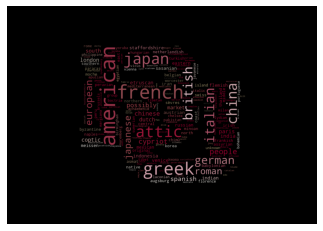

In [183]:
# generate a WordCloud for "Culture"

stopwords = set(STOPWORDS)

word_list = lines_to_words(df_clean['Culture'].dropna().tolist())

for i in range(len(word_list)):
    word_list[i] = word_list[i].lower()

word_string = ''
word_string += " ".join(word_list)+" "

# wordcloud = WordCloud(collocations=False, width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(word_string)
# plt.figure(figsize=(10,10), dpi=100)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.tight_layout(pad=0)

du_mask = np.array(Image.open('University-of-Denver-logo.png'))
colors = ImageColorGenerator(du_mask)
wordcloud = WordCloud(collocations=False, stopwords=stopwords, mask=du_mask, mode='RGB', background_color=None, color_func=colors).generate_from_text(word_string)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
# plt.title('')
plt.show()

#### Artist Role
- object
- Ex: 'nan', 'Maker', 'Designer|Manufacturer'
- Clean: split on vert bar?

<AxesSubplot:xlabel='Artist Role'>

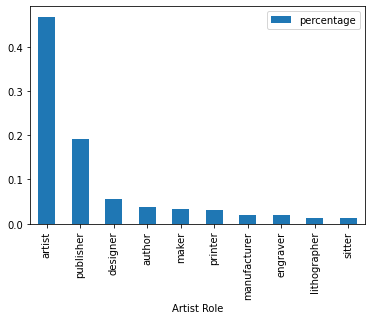

In [148]:
artist_roles = lines_to_words(df_clean['Artist Role'].dropna().tolist())
artist_roles_clean = []
for i in range(len(artist_roles)):
    artist_roles_clean.extend(artist_roles[i].lower().split('|'))

artist_roles_df = pd.DataFrame(artist_roles_clean, columns=['Artist Role'])

#calculate sum of values by group
df_groups = artist_roles_df.groupby(['Artist Role'])['Artist Role'].sum()

artist_roles_df = artist_roles_df['Artist Role'].dropna().groupby([artist_roles_df['Artist Role']]).count().reset_index(name='counts')
artist_roles_df['percentage'] = artist_roles_df['counts'] / artist_roles_df['counts'].sum()
top10 = artist_roles_df.sort_values(by='counts', ascending=False).head(10)
top10.plot.bar(x='Artist Role',y='percentage', rot=90)

#### Artist Display Bio
- object
- Ex: '1785–1844', 'nan', 'British, London 1873–1952 Hailsham, Sussex|British, Wiltshire 1877–1952 Oxford', '||||Female|Female'
- Issues: not sure what the vert bars separate
- None - don't use or use as-is

#### Object Date
- Numeric
- Ex: '1853', '1901', '1909–27', '1782-1784', 'December 1, 1925', 'after 1773'
- Clean: select first 4 digit number

<AxesSubplot:xlabel='Object Date'>

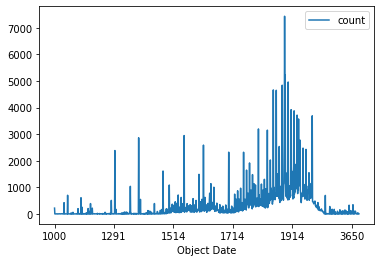

In [168]:
df_clean['Object Date'] = df_clean['Object Date'].str.extract('([0-9]{4})')
object_dates_df = df_clean['Object Date'].dropna().groupby([df_clean['Object Date']]).count().reset_index(name='count')

object_dates_df.plot(kind='line',x='Object Date', y='count')


#### Medium
- object
- Ex: 'Gold' 'Silver' 'Bronze or copper' ...
 'Overlay  for 23.112.2889,  graphite and ink on glazed linen tracing paper'
 - Don't use or use as-is
 #### Geography Type
 - object
 - Ex: 'nan' 'Made in' 'Probably made in' 'Possibly made in|Possibly made in'
 'Made in|Probably made in' 'Possibly made in' 'Made in|Made in'
 'Probably made in|Possibly made in' '(none assigned)'
 'Made in|Possibly made in' 'Made in|Probably made in|Probably made in'
 'Made in|Object place' 'Made in|(none assigned)'
 'Possibly made in|Possibly made in|Possibly made in'
 'Possibly made in|Probably made in'
 - Issues: not sure why multiple entries
 #### County
 - object
 - Ex: 'nan' 'Staffordshire' 'Bristol' ... 'Rhode Island' 
 - Clean: Could group/count words
 #### Subregion
 - object
 - Ex: 'Borsippa (Birs Nimrud)' 'probably from Sippar (modern Tell Abu Habba)'
 'Nimrud (ancient Kalhu)' 'Sippar (?) (modern Tell Abu Habba)'
 - Clean: could group and count words, drop probably, from, to, be, etc.. (maybe join with County)
 #### Excavation
 - object
 - Ex: 'nan' 'Egyptian Antiquities Service excavations, 1891'
 'Barsanti excavations, 1903' 'Carnarvon/Carter excavations, 1910'
 - Clean: maybe pull and group 4-digit dates
#### Rights and Reproduction
- object
- Ex: 'nan' '© 2022 Artists Rights Society (ARS), New York' '© Tao Lengyue' ... '© Kim Hyunju' '© Kim Seol' '© Sohn Daehyun'
- Clean: ???
#### Metadata Date
- empty
- Ex: 'nan' (for all records)
- Clean: none
#### Tags AAT URL
- object
- Ex: 'http://vocab.getty.edu/page/aat/300266506|http://vocab.getty.edu/page/aat/300037222'
 'http://vocab.getty.edu/page/aat/300250049|http://vocab.getty.edu/page/aat/300025928|http://vocab.getty.edu/page/aat/300123319'
 - Issues: TMI - don't use